## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod 2^{31}$$

pick a random $a$ and $b$ then try.

In [7]:
def f(x, a, b, itera): 
    print(x)
    if(itera == 0):
        return x
    else:
        return f((a*x + b )% (2**31), 11, 2017,itera-1)
f(17,11,2017, 1000)

17
2204
26261
290888
3201785
35221652
387440189
2114360448
1783130465
287084300
1010445669
377486136
2004865865
578690052
2070625293
1302043760
1437581489
781012860
1208885
13299752
146299289
1609294196
522368989
1451093600
929646081
1636174316
818050309
408620824
199863785
51020004
561222061
1878477392
1335900497
1810005596
582710741
2114852872
1788547129
346667604
1665862013
1144614976
1853348513
1059482828
916894885
1495911160
1422639241
616648132
340680525
1600004144
420178417
326997308
1449488757
911992808
1441988313
829487924
534434589
1583815200
242100033
515618732
1376840773
112864984
1241516841
771785380
2047190253
1044258320
749425297
1801229340
486171925
1052925896
844768633
702522388
1285297341
1253370880
902179809
1334045324
1789598693
358234808
1793101257
396763012
69427853
763708400
1958343473
66943740
736383157
1657765800
1055556633
873706740
1020841565
491840992
1115285633
1530725740
1805599621
534245016
1581729897
219161700
263297069
748786128
1794198481
408832476
202

843841569

a,b,modulo must be coprime
a,b, must be large enough

#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

In [8]:
x = 1239
a = 16645
b = 13232227
for i in range(30):
    xn = a*xn+b
    

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

In [10]:
from numpy.random import random, randint, randn
random()


0.1193147159337602

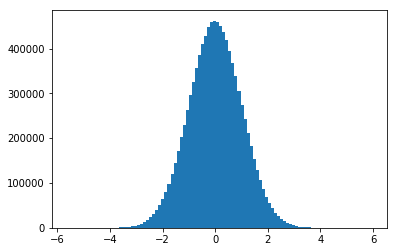

In [9]:
x= np.random.randn(10000000)
plt.hist(x, bins=100);

#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

[0,1) x5-> [0,5)

[0,1) x2-> [0,2) -1-> [-1, 1)

multiplu before you add adn then shift it


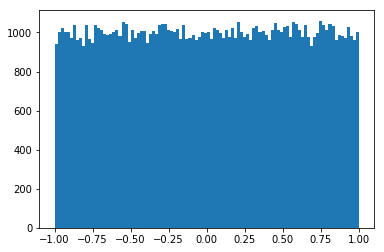

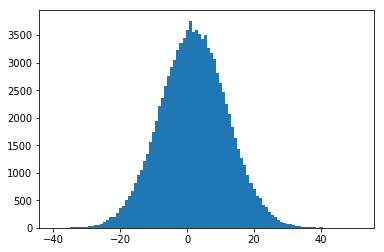

In [12]:
x = np.random.random(100000)*2-1
plt.hist(x, bins=100)
plt.figure()
x=np.random.randn(100000)*10+2
plt.hist(x, bins=100);

6) What does np.random.seed do?

In [ ]:
np.random.seed(2184390)
np.random.random(5)

In [19]:
np.random.random(5)

array([ 0.2032107 ,  0.50819331,  0.22084468,  0.64537302,  0.78026019])

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [14]:
n = 10000000
x = np.random.random(n)*2-1
y = np.random.random(n)*2-1
z = np.random.random(n)*2-1

print(np.sum(x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z))*8./n)

16.0909428444


$
\sum
$

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

In [44]:

n = 100000
x = np.random.random(n)*2-1
y = np.random.random(n)*2-1
z = np.random.random(n)*2-1
summ = 0
for i in range(n):
    if(x[i]**2+y[i]**2+z[i]**2<=1):
        summ+=x[i]**2*(y[i]-1)**2*(z[i]-2)**2*np.exp(x[i]*y[i]*z[i])
summ*8./n

3.9910908135788397

3) Do we guarantee to get the same answer when we repeat the experiment?

In [ ]:
no

4) What do we need to do to guarantee the same answer?

In [ ]:
seed it

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

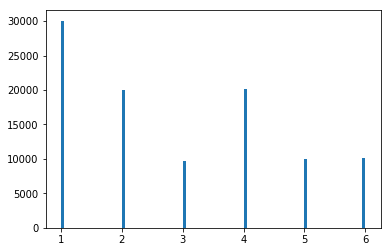

In [36]:
def rollLoadedDie():
    x = np.random.random()
    if (x > 0 and x <=0.3):
        return 1
    elif (x>0.3 and x<=0.5):
        return 2
    elif (x>0.5 and x<=0.6):
        return 3
    elif (x>0.6 and x<=0.8):
        return 4
    elif (x>0.8 and x<=0.9):
        return 5
    else: 
        return 6
    
x=[rollLoadedDie() for i in range(100000)]
plt.hist(x, bins=100);    

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [38]:
n = 10000
sum(rollLoadedDie() for i in range(n))/float(n)

2.9251

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [39]:
n = 10000
sum(rollLoadedDie()+rollLoadedDie() for i in range(n))/float(n)

5.819

4) What is the expected value of $AB$?

In [45]:
n = 10000
sum(rollLoadedDie()*rollLoadedDie() for i in range(n))/float(n)

8.4327

5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by #of times we get the number/total number of experiment.

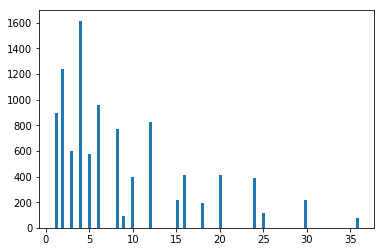

In [46]:
n = 10000
x=[rollLoadedDie()*rollLoadedDie() for i in range(n)]
plt.hist(x, bins=100); 

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

In [48]:
n = 10000
count =0
for i in range(n):
    A = rollLoadedDie()*rollLoadedDie()
    B = rollLoadedDie()*rollLoadedDie()
    if (A == B):
        count+=1
count/n

0.0829

7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

In [49]:
n = 10000
count = 0
for i in range(n):
    A = 3*rollLoadedDie()
    B= rollLoadedDie() * rollLoadedDie()
    if (A>B):
        count+=1
count/n

0.54

### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [54]:
def next_price(s, mu, sigma, dt):
    e = np.random.randn()
    return s + s *(mu*dt+e*sigma*math.sqrt(dt))


2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

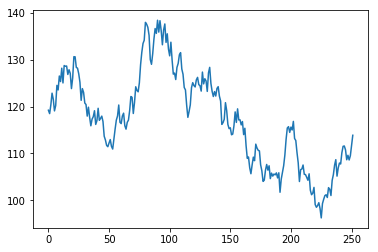

In [55]:
def gen_1year(mu, sigma):
    ret = []
    ndays = 252
    dt = 1/ndays
    s = 119.21
    ret.append(s)
    for i in range( ndays-1):
        s = next_price(s,mu,sigma,dt)
        ret.append(s)
    return ret
prices = gen_1year(0.0877, 0.28)
plt.plot(prices)

3) What is the expected value of the stock at the end of year?

4) What is the variance of the stock at the end of the year?

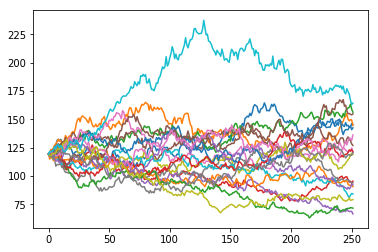

In [58]:
aapl = [gen_1year(0.0877, 0.28) for i in range(10000)] 

for i in range(20): 
    plt.plot(aapl[i])

5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [59]:
def dip_prob(n,below): 
    count = 0. 
    for i in range(n): 
        for j in range(len(aapl[i])): 
            if (aapl[i][j] < below) : 
                count += 1 
                break 
    return count/float(n)

print (dip_prob(10000,70))

0.0377


6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

### Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

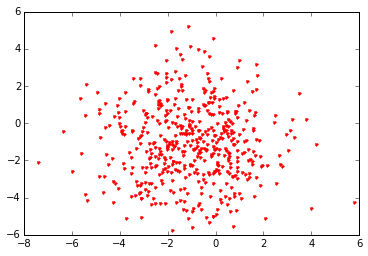

In [9]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [1]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 25 27 ..., 40  0 54]
 [25  0 64 ...,  0  0  8]
 [27 64  0 ...,  0 69 45]
 ..., 
 [40  0  0 ...,  0 25 70]
 [ 0  0 69 ..., 25  0 66]
 [54  8 45 ..., 70 66  0]]


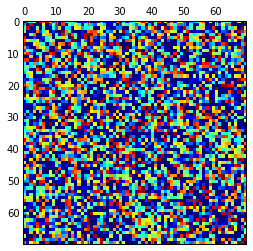

In [105]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print student

plt.matshow(student)

### Simulated Annealing

1) What's wrong with Hill Climbing?

2) What is the main idea for fixing that?

3) Implement the exam scheduling again with Simulated Annealing